# Exploratory Data Analysis

In [1]:
install.packages('dplyr')
install.packages('quantmod')
install.packages('ggplot2')
install.packages('reshape2')

also installing the dependency 'rlang'




  There are binary versions available but the source versions are later:
      binary source needs_compilation
rlang 0.4.11  1.0.2              TRUE
dplyr  1.0.6  1.0.8              TRUE

  Binaries will be installed
package 'rlang' successfully unpacked and MD5 sums checked
package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\humay\AppData\Local\Temp\RtmpMNrR3E\downloaded_packages
package 'quantmod' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\humay\AppData\Local\Temp\RtmpMNrR3E\downloaded_packages

  There is a binary version available but the source version is later:
        binary source needs_compilation
ggplot2  3.3.3  3.3.5             FALSE



installing the source package 'ggplot2'



package 'reshape2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\humay\AppData\Local\Temp\RtmpMNrR3E\downloaded_packages


In [1]:
library(dplyr)
library(ggplot2)
library(quantmod)
library(reshape2)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'quantmod' was built under R version 3.6.3"Loading required package: xts
Warning message:
"package 'xts' was built under R version 3.6.3"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.6.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Attaching package: 'xts'

The following objects are masked from 'package:dplyr':

    first, last

Loading required package: TTR
Warning message:
"package 'TTR' was built under R version 3.6.3"Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Warning message:
"package 'reshape2' was built under R version 3.6.3"

knitr::opts_chunk$set(fig.width=12)

In [49]:
# Import the data and look at the first six rows
ASX200_data <- read.csv(file = 'C:/Users/humay/Downloads/ASX200.csv')
ASX200_data$Date <- as.Date(ASX200_data$Date, format = "%m/%d/%Y")
head(ASX200_data)
colnames(ASX200_data)

Month.of.Date,Date,ASX200,X10.AED,X10.CNY,X10.000.IDR,X100.INR,X100.JPY,X1000.KRW,AU.10yr,...,Shanghai,Singapore.1yr,Singapore.30yr,Swiss.1yr,Swiss.30yr,UK.1yr,UK.30yr,US.1yr,US.30yr,USD
July 2010,2010-07-01,4238,0.30724,0.56739,0.7609,0.3904,0.7390,1.02580,5.10,...,2374,0.35,2.98,0.49,1.81,0.71,4.12,0.31,3.90,0.8366
July 2010,2010-07-02,4239,0.31025,0.57224,0.7650,0.3943,0.7433,1.03387,5.12,...,2383,0.35,2.97,0.47,1.81,0.72,4.12,0.31,3.95,0.8448
July 2010,2010-07-03,4239,0.31025,0.57224,0.7650,0.3943,0.7433,1.03387,5.12,...,2383,0.35,2.97,0.47,1.81,0.72,4.12,0.31,3.95,0.8448
July 2010,2010-07-04,4239,0.31025,0.57224,0.7650,0.3943,0.7433,1.03387,5.12,...,2383,0.35,2.97,0.47,1.81,0.72,4.12,0.31,3.95,0.8448
July 2010,2010-07-05,4222,0.31018,0.57217,0.7655,0.3944,0.7429,1.03235,5.07,...,2364,0.35,2.99,0.57,1.80,0.69,4.09,0.31,3.95,0.8446
July 2010,2010-07-06,4276,0.30919,0.57050,0.7636,0.3941,0.7389,1.02956,5.05,...,2409,0.36,2.99,0.54,1.80,0.68,4.13,0.31,3.89,0.8419


[1] "Month.of.Date"  "Date"           "ASX200"         "X10.AED"       
 [5] "X10.CNY"        "X10.000.IDR"    "X100.INR"       "X100.JPY"      
 [9] "X1000.KRW"      "AU.10yr"        "AU.1yr"         "CAC40"         
[13] "China.1yr"      "China.30yr"     "DAX"            "Dow.Jones"     
[17] "EUR"            "FED.rate"       "FTSE100"        "GBP"           
[21] "Germany.1yr"    "Germany.30yr"   "Hang.Seng"      "Hong.Kong.10yr"
[25] "Hong.Kong.1yr"  "Japan.1yr"      "Japan.30yr"     "Korea.1yr"     
[29] "Korea.20yr"     "NASDAQ"         "Nikkei.225"     "RBA.rate"      
[33] "S.P500"         "SGD"            "Shanghai"       "Singapore.1yr" 
[37] "Singapore.30yr" "Swiss.1yr"      "Swiss.30yr"     "UK.1yr"        
[41] "UK.30yr"        "US.1yr"         "US.30yr"        "USD"

## Comparison with other Markets

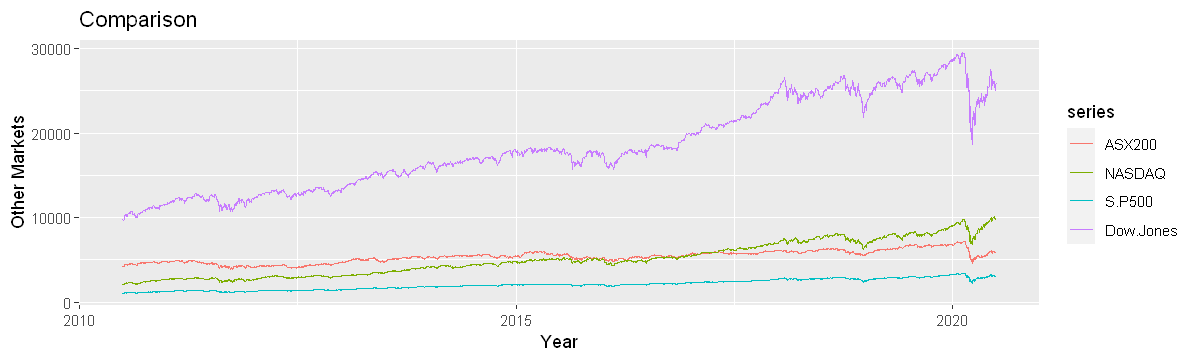

In [57]:
# combine data for ASX200,S&P500, NASDAQ, Dow Jones
df <-subset(ASX200_data, select=c("Date","ASX200", "NASDAQ","S.P500","Dow.Jones"))
df <- melt(df ,  id.vars = 'Date', variable.name = 'series')
df$Date <- as.Date(ASX200_data$Date, format = "%m/%d/%Y")
options(repr.plot.width = 10, repr.plot.height = 3)
ggplot(df,aes(x = Date, y = value, color = series,group=series)) + 
         geom_line() +
         labs(x = "Year", y = "Other Markets", 
              title = "Comparison")

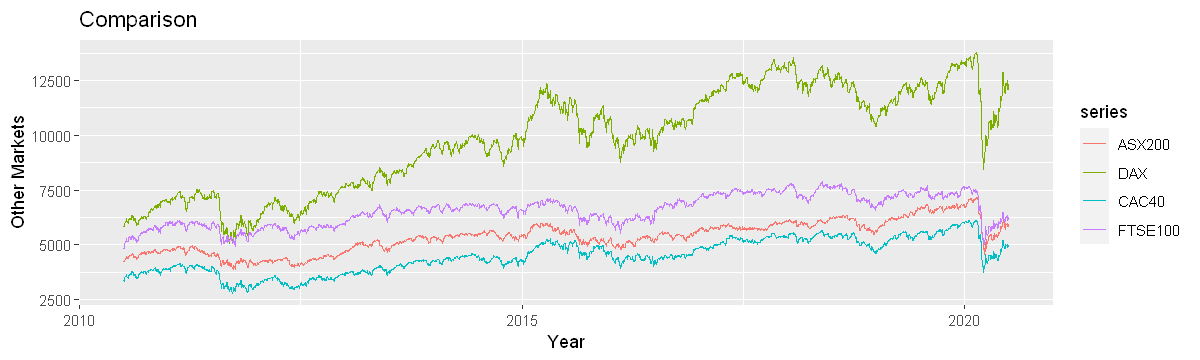

In [56]:
# combine data for ASX200,DAX,CAC40, FTSE100
df <-subset(ASX200_data, select=c("Date","ASX200", "DAX","CAC40","FTSE100"))
df <- melt(df ,  id.vars = 'Date', variable.name = 'series')
df$Date <- as.Date(ASX200_data$Date, format = "%m/%d/%Y")
options(repr.plot.width = 10, repr.plot.height = 3)
ggplot(df,aes(x = Date, y = value, color = series,group=series)) + 
         geom_line() +
         labs(x = "Year", y = "Other Markets", 
              title = "Comparison")

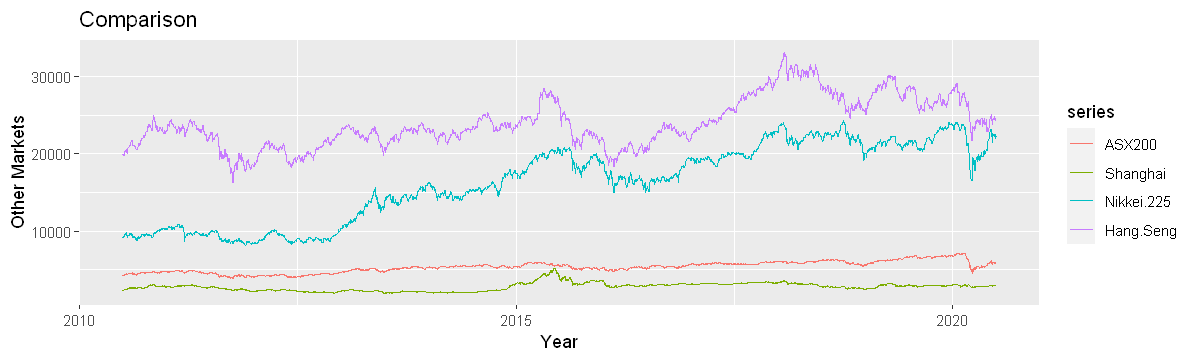

In [55]:
df <-subset(ASX200_data, select=c("Date","ASX200", "Shanghai","Nikkei.225","Hang.Seng"))
df <- melt(df ,  id.vars = 'Date', variable.name = 'series')
df$Date <- as.Date(ASX200_data$Date, format = "%m/%d/%Y")
options(repr.plot.width = 10, repr.plot.height = 3)
ggplot(df,aes(x = Date, y = value, color = series,group=series)) + 
         geom_line() +
         labs(x = "Year", y = "Other Markets", 
              title = "Comparison")

## Comparison with Currency Exchange Rates

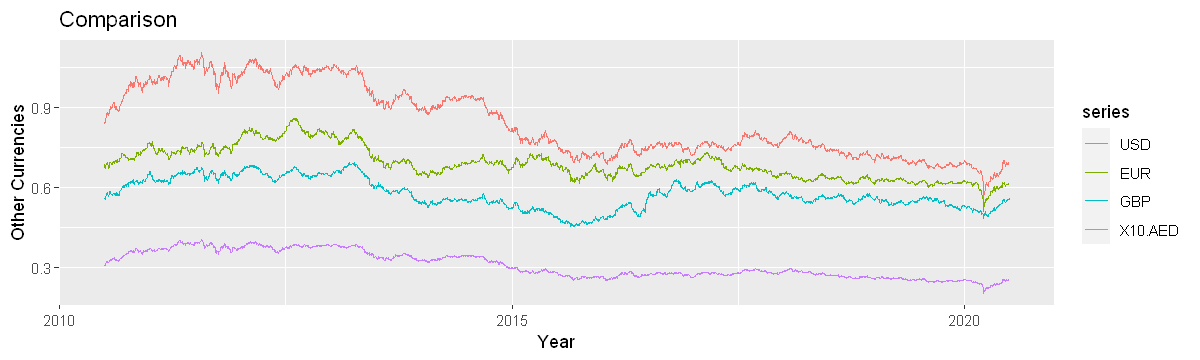

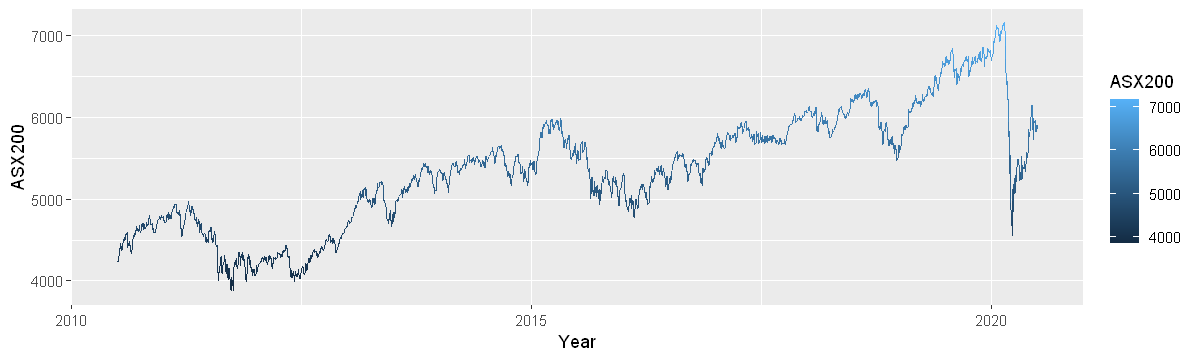

In [54]:
df <-subset(ASX200_data, select=c("Date","USD","EUR","GBP","X10.AED"))
df <- melt(df ,  id.vars = 'Date', variable.name = 'series')
df$Date <- as.Date(ASX200_data$Date, format = "%m/%d/%Y")
options(repr.plot.width = 10, repr.plot.height = 3)
p <- ggplot(df,aes(x = Date, y = value, color = series,group=series)) + 
         geom_line() +
         labs(x = "Year", y = "Other Currencies", 
              title = "Comparison")
q<-ggplot(ASX200_data,aes(x = Date, y = ASX200,color=ASX200)) + 
         geom_line() +
         labs(x = "Year", y = "ASX200")

p
q

## Comparison with Risk Free Credit

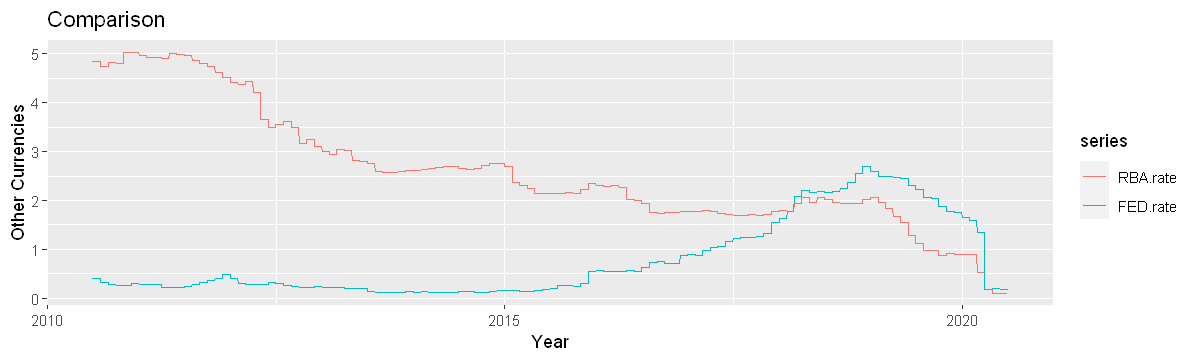

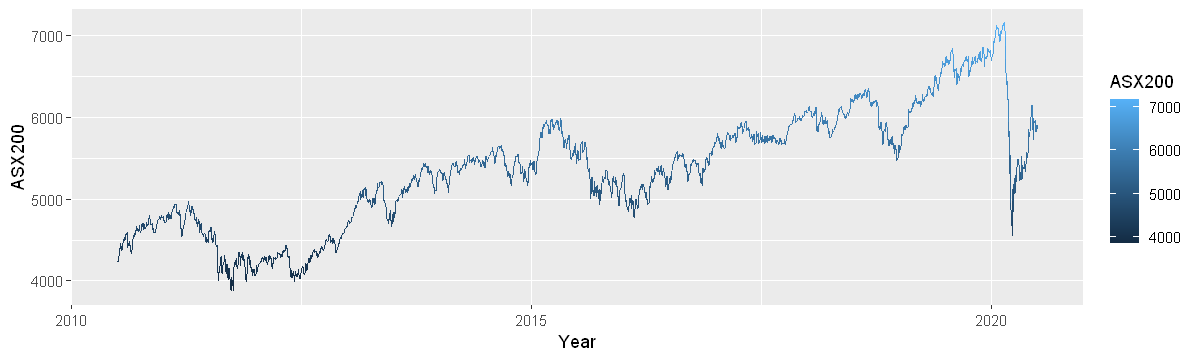

In [62]:
df <-subset(ASX200_data, select=c("Date","RBA.rate","FED.rate"))
df <- melt(df ,  id.vars = 'Date', variable.name = 'series')
df$Date <- as.Date(ASX200_data$Date, format = "%m/%d/%Y")
options(repr.plot.width = 10, repr.plot.height = 3)
p1 <- ggplot(df,aes(x = Date, y = value, color = series,group=series)) + 
         geom_line() +
         labs(x = "Year", y = "Other Currencies", 
              title = "Comparison")
q1 <-ggplot(ASX200_data,aes(x = Date, y = ASX200,color=ASX200)) + 
         geom_line() +
         labs(x = "Year", y = "ASX200")

p1
q1